<a href="https://colab.research.google.com/github/dsmohiit/Machine-Learning-Repo/blob/main/Cross_Validation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("/content/BostonHousing.csv")

In [7]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


### Hold Out Approach

In [8]:
X = df.iloc[:, :-1]
y = df["medv"]

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [12]:
random_states = list(range(1, 51))
r2_scores = []

for i in random_states:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= i)

  lr_model = LinearRegression()
  lr_model.fit(X_train, y_train)

  y_pred = lr_model.predict(X_test)
  r2_scores.append(r2_score(y_test, y_pred))

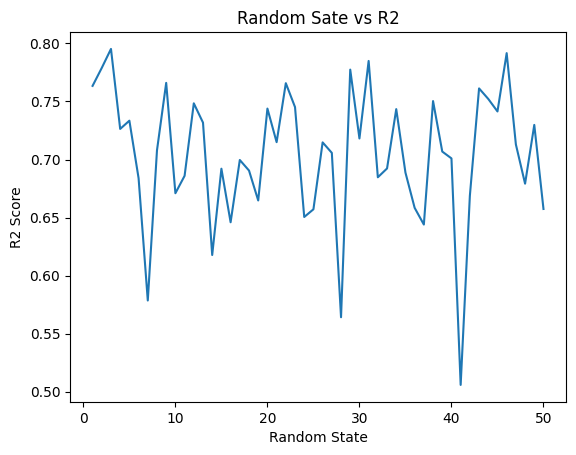


From the graph above it is clear that for each random_state the performance of
the model is different, showing high variance.



In [21]:
plt.plot(random_states, r2_scores)

plt.xlabel("Random State")
plt.ylabel("R2 Score")

plt.title("Random Sate vs R2")
plt.show()

print("""
From the graph above it is clear that for each random_state the performance of
the model is different, showing high variance.
""")

### Leave One Out Cross Validation

In [4]:
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.linear_model import LinearRegression

In [5]:
# Input features and Target feature
X = df.iloc[:, :-1]
y = df["medv"]

In [6]:
# Leave One Out Object
loo = LeaveOneOut()

In [7]:
# LR Model
lr_model = LinearRegression()

In [8]:
# Cross Val.
scores = cross_val_score(lr_model, X, y, scoring= "neg_mean_squared_error", cv= loo) # "neg_mean_squared_error" means we want to reduce the MSE as much as possible

In [9]:
# Inverting the scores
scores = - scores

In [10]:
scores

array([3.72979719e+01, 1.19996083e+01, 1.74878280e+01, 2.37110133e+01,
       7.04199800e+01, 1.22185247e+01, 1.06607826e-02, 6.08323283e+01,
       2.76061960e+01, 4.35492529e-04, 1.71891129e+01, 7.57242810e+00,
       6.52257805e-01, 7.37772576e-01, 1.20890968e+00, 3.73396196e-01,
       6.92394876e+00, 3.54752744e-01, 1.69701375e+01, 4.35547121e-02,
       1.20164044e+00, 3.82170339e+00, 4.13536519e-01, 4.99399777e-01,
       6.33146773e-03, 2.72147161e-01, 1.33111630e+00, 8.65299886e-03,
       1.36231825e+00, 1.57472599e-02, 1.61151928e+00, 1.31345333e+01,
       2.06757013e+01, 1.44397569e+00, 4.47571447e-02, 2.46360177e+01,
       5.59248522e+00, 4.55268647e+00, 3.28660467e+00, 3.31240848e-01,
       5.01414236e-01, 2.13097952e+00, 9.67926125e-03, 8.52754852e-03,
       3.10007107e+00, 8.03207324e+00, 1.84421470e-01, 2.15724847e+00,
       3.10857366e+01, 4.97324456e+00, 2.56665919e+00, 1.24320814e+01,
       7.23742751e+00, 4.33023528e-01, 1.38938898e+01, 1.94058162e+01,
      

In [63]:
print("Mean MSE across all folds: ", scores.mean())

Mean MSE across all folds:  0.9600000000000002


### K - Fold Cross Validation

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [13]:
X = df.iloc[:, :-1]
y = df["medv"]

In [18]:
lr = LinearRegression()
k_fold = KFold(n_splits= 10, shuffle= True, random_state= 42)

In [23]:
scores = cross_val_score(lr, X, y, cv= k_fold, scoring= "r2")

In [62]:
print("Mean R2 score across all fold :", scores.mean() )

Mean R2 score across all fold : 0.9600000000000002


### Stratified K - Fold CV

In [38]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [53]:
data = load_iris()

In [54]:
X, y = data.data, data.target

In [55]:
scaler = StandardScaler()

In [56]:
X = scaler.fit_transform(X)

In [57]:
skf = StratifiedKFold(n_splits= 5, shuffle= True)

In [58]:
lgr_model = LogisticRegression(max_iter= 100, random_state= 42)

In [59]:
scores = cross_val_score(lgr_model, X, y, cv= skf, scoring= "accuracy")

In [61]:
print("Mean accuracy across all folds: ", scores.mean())

Mean accuracy across all folds:  0.9600000000000002
